# 📖 Introducción

**Introducción** <br>
En este trabajo se aborda el análisis de la relación entre el salario de los empleados del área de Data Science y su perfil laboral. Se busca responder preguntas como ¿Cómo influye el nivel de experiencia en el salario? ¿Hay diferencias salariales entre empleados que trabajan de forma remota y los que no?<br>

**Audiencia**<br>
Este estudio está dirigido a empresas que buscan conocer la tendencia salarial de los empleados en el área de Data Science y a los empleados que buscan negociar mejores salarios en función de su perfil. Además, podría ser de utilidad para estudiantes que buscan orientación sobre qué áreas de estudio podrían ser más rentables a largo plazo y para los profesionales que buscan explorar otras áreas de trabajo.<br>

**Temática** <br>
La temática que se aborda en este trabajo es la relación entre el salario de los empleados del área de Data Science y su perfil laboral, teniendo en cuenta variables como el nivel de experiencia, la ubicación geográfica, el tipo de empresa en la que trabajan y si desempeñan su trabajo de forma remota o presencial. El objetivo principal es obtener información útil y precisa para las empresas y empleados que buscan tomar decisiones basadas en datos en cuanto a los salarios del área de Data Science.<br> <br>

### 📜 **Storytelling**


 **Contexto Comercial:** Somos una empresa que brinda servicios de consultoría en el área de recursos humanos. Uno de nuestros clientes es una compañía de tecnología que está interesada en mejorar su estrategia de retención de talentos.

**Problema Comercial**: Nuestro trabajo es analizar el conjunto de datos proporcionados por la empresa cliente y encontrar patrones y tendencias que puedan ayudar a mejorar la retención de talentos. En particular, queremos entender cómo las condiciones laborales (como el salario, el tipo de contrato, la ubicación, etc.) influyen en la decisión de los empleados de permanecer en la empresa o buscar oportunidades en otro lugar.

**Objetivo**: El objetivo de este análisis es proporcionar una exploración detallada de los datos y brindar información precisa al empleador para responder a sus preguntas y obtener información valiosa sobre los salarios en la empresa. Al finalizar el mismo, crearemos un algoritmo que sea capaz de clasificar distintas caracteristicas en un rango salarial.

**Preguntas**
```
a) El nivel de salario aumenta con base en la cantidad de experiencia que posea el empleado?
b) Los salarios aumentaron o decrecieron con el paso de los años?
c) Pagamos mejor a los trabajadores en remoto, o los presenciales?
d) Que área específica pagamos más?
e) Hay más trabajadores en remoto, o presenciales?
f) Las compañías grandes pagan más?
g) Aumenta según el tipo de contratación?
h) Donde reside el empleado, tiene variabilidad en los salarios?
```


Estas preguntas serán nuestro punto de partida para explorar los datos y responder a las inquietudes de nuestro cliente. Con ellas como guía, buscaremos obtener insights valiosos y finalizar cualquier duda o consulta que pueda tener

# ✈️**Contexto analítico**



Se observan las librerías a utilizar.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

In [2]:
%pip install mlxtend
%pip install plotly_express==0.4.0
%pip install xgboost
%pip install tabulate
clear_output()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy
import plotly.express as px
import warnings
from tabulate import tabulate

El dataset proporcionado por la empresa incluye información sobre el salario y las condiciones laborales de los empleados en el campo de la Ciencia de Datos.<br>
 El mismo está en formato CSV y consta de varias columnas que contienen detalles sobre el año de trabajo, el nivel de experiencia, el tipo de contrato, el título del trabajo, el salario y la moneda utilizada, así como el salario en dólares. También se incluyen detalles sobre la residencia del empleado, si trabaja en remoto, híbrido o de forma presencial, la localización o región de la empresa y el tamaño de la empresa. <br> <br>
Debajo, una breve descripcion de las columnas del dataset.

* **Work_Year**: Año de trabajo.<br>
* **Experience_Level**: Nivel de experiencia.<br>
* **Employment_Type**: Tipo de contratacion.<br>
* **Job_Title**: Titulo del trabajo.<br>
* **Salary**: Salario.<br>
* **Salary_Currency**: Tipo de moneda utilizada en el salario.<br>
* **Salary_In_USD**: Salario en dolares.<br>
* **Emplyee_Recience**: Recidencia del empleado.<br>
* **Remote_Ratio**: Si trabaja en remoto, hibrido o precencial.<br>
* **Company_Location**: Localizacion o region de la empresa.<br>
* **Company_Size**: Tamaño de la empresa.<br>

##**💡 Data Adquisition**

Se realiza la apertura con la libreria de pandas, para la lectura del csv

In [4]:
df_salary = pd.read_csv("datascience_salaries.csv",sep=',')

In [5]:
df_salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 🔎**Data Wranling**

En esa examinacion, se han realizado los ajustes de limpieza necesarios para dejar listos los datos para análisis. <br>
Detallaremos los cambios a continuación:<br>
* Se han analizado los datos.
  * Valores nulos.
  * Valores duplicados.
* Se observan 41 filas duplicadas, pero al inspeccionar vemos que hay datos que difieren, dejaremos esas filas al representar un 6.7% de nuestras observaciones
* Se han detallado de mejor manera algunas columnas para mejorar la claridad en el análisis.
* Se ha eliminado la columna de index, dado que no es necesario.
* Se ha eliminado la columna en salario en distintas monedas, ya que trabajaremos enteramente con dolares americanos. Junto con la columna de divisa.
* Se ha realizado una copia para trabajar con un encoder (categoricas a numericas), y realizamos otra copia para los algoritmos de aprendizaje automático.
* Se ha realizado la discretización de datos mediante la agrupación en intervalos personalizados para la columna 'Salario_en_dolares
* Se ha realizado el filtrado de datos para eliminar los salarios mayores a 300,000 USD en la columna 'Salario_en_dolares


### Valores nulos

In [6]:
print("Número de valores nulos por columna:")
print(df_salary.isnull().sum())

Número de valores nulos por columna:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
duplicates = df_salary.duplicated()

# Contamos el número de filas duplicadas
num_duplicates = duplicates.sum()

# Imprimimos el resultado
if num_duplicates > 0:
    print(f"El DataFrame tiene {num_duplicates} filas duplicadas.")
else:
    print("El DataFrame no tiene filas duplicadas.")

El DataFrame no tiene filas duplicadas.


### Reclasificacion

* Se renombran las siguientes columnas para un mejor entendimiento, ademas de cambiar el nombre de las abreviaturas observadas.


In [8]:
df_salary['experience_level'] = df_salary['experience_level'].replace('EN','Junior')
df_salary['experience_level'] = df_salary['experience_level'].replace('MI','Mid_Junior')
df_salary['experience_level'] = df_salary['experience_level'].replace('SE','Senior')
df_salary['experience_level'] = df_salary['experience_level'].replace('EX','Ejecutivo')

df_salary['employment_type'] = df_salary['employment_type'].replace('PT','Medio_Tiempo')
df_salary['employment_type'] = df_salary['employment_type'].replace('FT','Full_Time')
df_salary['employment_type'] = df_salary['employment_type'].replace('CT','Contrato')
df_salary['employment_type'] = df_salary['employment_type'].replace('FL','Freelance')

In [9]:
df_salary = df_salary.rename(columns={
    'work_year': 'Anio_Laboral',
    'experience_level': 'Nivel_de_experiencia',
    'employment_type': 'Tipo_de_contrato',
    'job_title': 'Titulo_de_trabajo',
    'salary_in_usd': 'Salario_en_dolares',
    'employee_residence': 'Residencia_del_empleado',
    'remote_ratio': 'Ratio_remoto',
    'company_location': 'Localizacion_de_la_compania',
    'company_size': 'Tamanio_de_compania'
})


### Eliminacion de la columnas

In [10]:
del df_salary['Unnamed: 0']
del df_salary['salary']
del df_salary['salary_currency']

# 📊Comienzo a responder las preguntas del cliente (EDA)🔭

Comienzo el desarrollo de los datos, comenzamos con un encabezado que nos traera los datos en el DF.

* Se observan los distintos tipos de datos en nuestro Dataframe
* Se realiza un head, para observar nuestras observaciones.

In [11]:
dtypes_info = df_salary.dtypes.reset_index()
dtypes_info.columns = ["Columna", "Tipo de Dato"]

# Mostrar la información utilizando tabulate
print(tabulate(dtypes_info, headers='keys', tablefmt='pretty'))

+---+-----------------------------+--------------+
|   |           Columna           | Tipo de Dato |
+---+-----------------------------+--------------+
| 0 |        Anio_Laboral         |    int64     |
| 1 |    Nivel_de_experiencia     |    object    |
| 2 |      Tipo_de_contrato       |    object    |
| 3 |      Titulo_de_trabajo      |    object    |
| 4 |     Salario_en_dolares      |    int64     |
| 5 |   Residencia_del_empleado   |    object    |
| 6 |        Ratio_remoto         |    int64     |
| 7 | Localizacion_de_la_compania |    object    |
| 8 |     Tamanio_de_compania     |    object    |
+---+-----------------------------+--------------+


In [12]:
df_salary.head()

,Anio_Laboral,Nivel_de_experiencia,Tipo_de_contrato,Titulo_de_trabajo,Salario_en_dolares,Residencia_del_empleado,Ratio_remoto,Localizacion_de_la_compania,Tamanio_de_compania
0,2020,Mid_Junior,Full_Time,Data Scientist,79833,DE,0,DE,L
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior,Full_Time,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid_Junior,Full_Time,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,US,50,US,L


## 📈 Analisis Univariado

### Nivel de Experiencia

In [13]:
experience_level = df_salary['Nivel_de_experiencia'].value_counts()
px.bar(y=experience_level.values, x=experience_level.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos ver que dentro de esta columna, senior predomina los datos. Por siguiente tenemos Midlevel, junior y finalmente Executive level. Aun que no sorprenda, la mayoría de nuestros científicos de datos son nivel Senior o semi senior, y lo mas raro de encontrar seria aquellos en posición de ejecutivos.

### Titulo de trabajo

Podemos darnos cuenta de que Data scientist, Data Engineer y Data Analyst predominan la columna. Esto no nos da tanta información, pero si nos brinda cierto conocimiento sobre las posiciones mas populares.

* Se observa que las observaciones estan muy desbalanceadas, y puede significar que no usaremos esta columna para los algoritmos

In [14]:
print('Hay actualmente:', df_salary['Titulo_de_trabajo'].value_counts().size, 'trabajos en la columna Titulo_de_trabajo')

Hay actualmente: 50 trabajos en la columna Titulo_de_trabajo


In [15]:
top10_trabajos = df_salary['Titulo_de_trabajo'].value_counts()[:10]
px.bar(y=top10_trabajos.values, x=top10_trabajos.index, color = top10_trabajos.index, color_discrete_sequence=px.colors.sequential.deep)

### Tipo de Contrato

Luego de esta exploracion de datos, podemos darnos cuenta que el 96.86% de los datos, se encuentran en full-time. De esta manera, cambiaremos el enfoque de trabajo, y trabajaremos unicamente con la columna full-time. Y posterior mente la eliminaremos para evitar el sesgo de datos al momento de realizar los modelos de machine learning.

Al analizar la columna de "Residencia_del_empleado" y la ubicación de la compañía, observamos que hay una gran cantidad de datos en la categoría "Full-Time". Esto sugiere que existe una fuerte correlación entre la ubicación del empleado y la ubicación de la compañía, ya que es probable que ambos estén en el mismo lugar cuando se trata de contratos de tiempo completo. Como resultado, al construir un modelo de aprendizaje automático, esta variable puede descartarse debido a su alta correlación y falta de variabilidad, lo cual puede no aportar información significativa para predecir el salario.

In [16]:
fig = px.histogram(df_salary, x='Tipo_de_contrato')

fig.update_layout(
    title='Conteo de Tipo de Contrato',
    xaxis_title='Tipo de Contrato',
    yaxis_title='Conteo'
)

fig.show()

### Residencia del empleado

Podemos observar que la mayoría de los datos de nuestros empleados están basados en los Estados Unidos. Sin embargo, esta concentración de datos puede plantear un sesgo en nuestros modelos de aprendizaje automático, dado que la diversidad geográfica es importante para una mayor precisión. Es necesario tener en cuenta este sesgo y buscar maneras de mitigarlo, ya que puede afectar la generalización de nuestros modelos en otras regiones geográficas.

In [17]:
residence = df_salary['Residencia_del_empleado'].value_counts()
top10_employee_location = residence[:10]
px.bar(y=top10_employee_location.values, x=top10_employee_location.index, color = top10_employee_location.index, color_discrete_sequence=px.colors.sequential.deep)

### Año Laboral


En el conjunto de datos que estamos utilizando, podemos observar que la mayoría de las observaciones corresponden a los años 2021 y 2022. Si bien existe cierta preocupación por la ausencia de información del año 2020, decidimos enfocarnos en los datos disponibles de los últimos dos años para obtener un análisis más robusto y estable. De esta manera, podemos estar seguros de que las tendencias y patrones que encontramos son más representativos y precisos de la situación actual.

In [18]:
workyear = df_salary['Anio_Laboral'].value_counts()
px.pie(values=workyear.values, names=workyear.index ,color_discrete_sequence=px.colors.sequential.deep )

### Salary in usd

Podemos observar que los salarios en promedio se encuentran entre los 62.000 y los 150.000 dólares, con una mediana de 101.000 dólares. También podemos notar que existen algunos outliers que cobran salarios mucho más altos, llegando hasta los 600.000 dólares.

In [19]:
fig1 = px.box(y=df_salary['Salario_en_dolares'])
fig1.show()
plt.show

<function matplotlib.pyplot.show(*args, **kwargs)>

### Remote ratio

En este caso, podemos observar que hay muchos más casos de personas trabajando de forma totalmente remota que de forma parcial o presencial. <br> Esto puede deberse a que en las posiciones de Data Scientist, la presencia física no es tan crucial, ya que se trata de posiciones que requieren principalmente conocimientos de negocio y habilidades en programación, así como la implementación de buenas prácticas.

In [20]:
remote_ratio = df_salary['Ratio_remoto'].value_counts()
px.pie(values=remote_ratio.values, names=remote_ratio.index ,color_discrete_sequence=px.colors.sequential.deep )

### Tamaño de compañia

Al analizar los datos, podemos notar que las compañías de tamaño mediano tienen la mayor cantidad de empleados, seguidas por las compañías grandes y, por último, las pequeñas o "small".

In [21]:
tamanio_compañia = df_salary['Tamanio_de_compania'].value_counts()
px.pie(values=tamanio_compañia.values, names=tamanio_compañia.index ,color_discrete_sequence=px.colors.qualitative.Pastel)

### Localizacion de la compañia

Se observa un grafico muy similar a la localizacion de los empleados, esto debido a que en nuestras observaciones, se determina que el empleado trabaja en la misma localizacion de la compañia, con pocas observaciones distintas a esta.
<br> Siendo este el caso, es probable que esta columna no sea utilizada en nuestros algoritmos, por que es muy similar a la localizacion de nuestros empleados.

In [22]:
company_location = df_salary['Localizacion_de_la_compania'].value_counts()

# Tomar las 10 principales ubicaciones
top10_company_location = company_location[:10]

# Crear el gráfico de barras utilizando Plotly Express
fig = px.bar(x=top10_company_location.index, y=top10_company_location.values,
             color=top10_company_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             labels={'x': 'Ubicación de la Compañía', 'y': 'Cantidad de Empleados'})

# Mostrar el gráfico
fig.show()

## 📈 Analisis Bivariado y respuestas a las preguntas

### El nivel de salario aumenta en base a la cantidad de experiencia?


Comienzo por utilizar un boxplot para graficar el nivel de salario en relación con el nivel de experiencia. La respuesta clara: a medida que aumenta la experiencia, también lo hacen los salarios. En este boxplot se puede apreciar que el nivel salarial más bajo se encuentra en la categoría de entry, seguida por mid junior, y posteriormente senior y Ejecutivo.
Siendo la media del Junior unos 56k y la media de un ejecutivo 171k.

In [23]:
boxplotmedian = df_salary.groupby('Nivel_de_experiencia')['Salario_en_dolares'].median().sort_values()
px.box(df_salary, x='Nivel_de_experiencia', y='Salario_en_dolares', category_orders={"Nivel_de_experiencia": boxplotmedian.index})

### Salarios en medida de los años

Al momento de graficar los datos de los salarios en relacion de los años, podemos darnos cuenta de un aumento constante, pero pequeño. dado que la media en el 2020 era de 75k (recordemos que realizamos una escala logaritmica) Y en el 2022 podemos hayar una media de 120k. Es importante ver que, a pesar de todo, en años posteriores teniamos outliers que sobrepasan con amplia cantidad, a candidatos en posiciones similares pero actuales.
Fuente: https://www.datacamp.com/blog/data-science-salaries

In [24]:
boxplotyear = df_salary.groupby('Anio_Laboral')['Salario_en_dolares'].median().sort_values()
fig = px.box(df_salary, y='Salario_en_dolares', x='Anio_Laboral')
fig.update_layout(xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=True, zeroline=False))
fig.show()


### Salarios remotos, hibridos y precenciales.

Finalmente, visualicé los salarios mediante un boxplot, agrupados por la forma de trabajar: 0 indica trabajo presencial y 100 trabajo remoto. Al incluir el nivel de experiencia, noté que, aunque no es lo que se podría esperar, hay algunos trabajadores senior ganando más que los expertos que trabajan en remoto. Además, se observa que los salarios en formato de dólares son ligeramente más altos en trabajos remotos que en los presenciales. Sin embargo, también se identificaron outliers en el gráfico.

In [25]:
fig = px.box(df_salary, x='Ratio_remoto', y='Salario_en_dolares', title="Boxplot Ratio Remoto vs Salario")
fig.show()

### Titulo mejor pagado.

Procededemos a organizar los datos ordenando los títulos de trabajo por nivel de salario. De esta manera, obtuvimos una lista de los títulos de trabajo en orden ascendente de salario. Según los datos, el título de trabajo mejor pagado es "Data Analytics lead", seguido por "Principal Data Engineer" y "Financial data Analyst". Es importante destacar que existen algunos valores atípicos (outliers) que cobran bastante más que la media del salario del puesto de "Data Analytics lead

<function matplotlib.pyplot.show(close=None, block=None)>

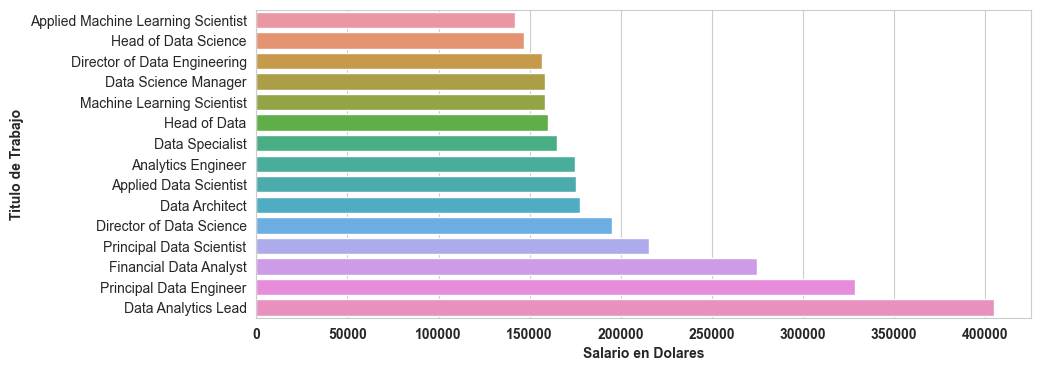

In [26]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sorted_jobs = df_salary.groupby('Titulo_de_trabajo')['Salario_en_dolares'].mean().sort_values().iloc[35:].index
sns.barplot(data=df_salary, y='Titulo_de_trabajo', x='Salario_en_dolares', order=sorted_jobs, orient= 'h', errorbar=None)
plt.xticks(weight = 'bold')
plt.xlabel('Salario en Dolares', fontweight='bold' )
plt.ylabel('Titulo de Trabajo', fontweight='bold')
plt.show

### Tamaño de la compañia

La información que presentamos aquí es un poco más compleja, por lo que intentaremos ser detallados.

* En primer lugar, es importante destacar que el punto más alto del bigote en la caja de los datos de las compañías más pequeñas es inferior en comparación con las compañías medianas o grandes, lo que sugiere que, en general, las compañías pequeñas pagan salarios más bajos.

* No obstante, hay que tener en cuenta que las compañías grandes suelen tener outliers que presentan una cantidad bastante sobresaliente de salarios más altos. Esto se debe a que, a diferencia de las demás, las compañías grandes tienen más recursos para ofrecer salarios más altos a empleados con niveles de experiencia más altos. (Fuente: https://www.datacamp.com/blog/data-science-salaries)

* Por otro lado, podemos notar que el salario mínimo en las compañías grandes es más alto que en sus competidoras. No obstante, la media salarial en las compañías medianas es mayor. Estos resultados pueden deberse a diversos factores, como la complejidad de los trabajos, la competitividad del mercado laboral y la ubicación geográfica de las empresas.

* En general, los datos nos sugieren que las compañías grandes tienen mayores recursos para ofrecer salarios más altos, pero que las compañías medianas pueden ser más competitivas en términos de salarios medios. Es importante tener en cuenta que la interpretación de los datos puede estar influenciada por múltiples factores y que se necesitaría un análisis más profundo para confirmar estas hipótesis.


In [27]:
boxplot_company = df_salary.groupby('Tamanio_de_compania')['Salario_en_dolares'].median().loc[['S', 'M', 'L']].index
fig = px.box(df_salary, x='Tamanio_de_compania', y='Salario_en_dolares',
             category_orders={'Tamanio_de_compania': boxplot_company},
             color_discrete_sequence=['#636EFA'],
             title='Salarios en función del tamaño de la compañía',
             labels={'Tamanio_de_compania': 'Tamaño de la compañía', 'Salario_en_dolares': 'Salario en dólares'})
fig.show()


### Tipo de contratacion

Podemos observar en este grafico, que el salario de los que estan bajo contrato son mas altos, sin embargo debemos tener en cuenta, de que nuestro conjunto de datos apenas tiene informacion sobre los diferentes tipos de contratacion a excepcion de "Full-time".


<function matplotlib.pyplot.show(close=None, block=None)>

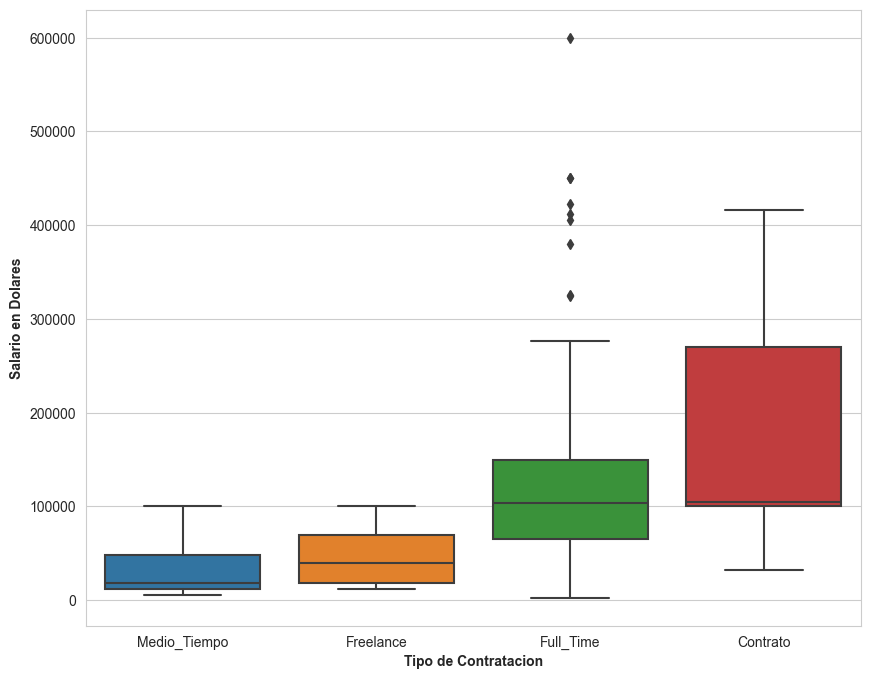

In [28]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(data=df_salary, x='Tipo_de_contrato', y='Salario_en_dolares', order=['Medio_Tiempo','Freelance','Full_Time','Contrato'])
plt.xlabel('Tipo de Contratacion', fontweight='bold')
plt.ylabel('Salario en Dolares', fontweight='bold')
plt.show

### Salario por Residencia

En este caso vemos que los salarios se encuentras ubicados por residencia y de mayor a menor, hemos quitado los valores del conteo menor a 15, por que me estaba representando un sesgo de informacion
*  El salario en los Estados Unidos es el mas alto, superando los  los 140.000
*  El segundo puesto se lo atribuye a Canada, siguiendo a este Alemania

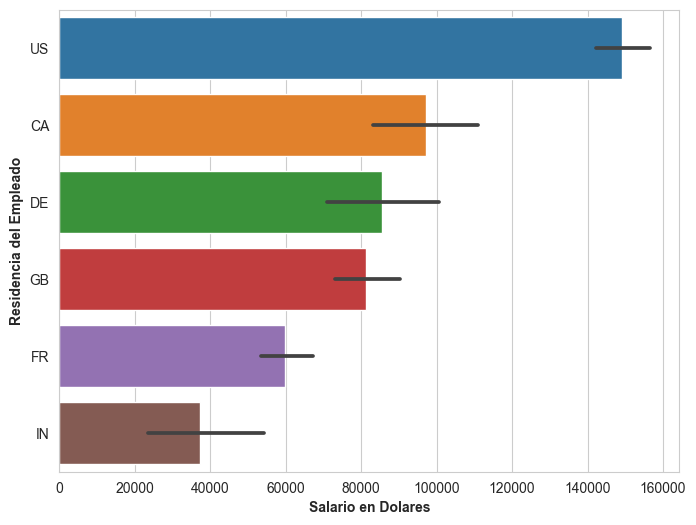

In [29]:
Conteo_residencia = df_salary["Residencia_del_empleado"].value_counts()
Categoria_interes = Conteo_residencia[Conteo_residencia > 15].index.tolist()
df_salary_recidense = df_salary[df_salary["Residencia_del_empleado"].isin(Categoria_interes)]



sorted_residence = df_salary_recidense.groupby('Residencia_del_empleado')['Salario_en_dolares'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_salary_recidense, y='Residencia_del_empleado', x='Salario_en_dolares', order=sorted_residence, orient='h')
plt.xlabel('Salario en Dolares', fontweight='bold')
plt.ylabel('Residencia del Empleado', fontweight='bold')
plt.show()


# 🤓 Conclusion EDA

Gracias a este análisis exploratorio, nos podemos dar cuenta de varias cosas.
<ol>
<li>La variable objetiva a querer predecir será Salario en Dólares, por su importancia y objetividad.

<li>Podemos sacar varias conclusiones, pero nos damos cuenta de que las variables más importantes las vemos en los niveles de experiencia, la localización del empleado y donde está ubicada la compañía, ademas de una minima diferencia entre los años posteriores y anteriores al 2022

<li>Nuestros datos no son lineales.

<li>Tenemos poca información en algunas columnas, que puede representar un problema el momento de realizar MachineLearning, como pueden ser la cantidad vista en el análisis uni variado, en donde en algunas columnas predominaban por una amplia mayoría datos de un tipo

<ol>


# 🔎 **DataWranling enfocado a MachineLearning**

En esta ocasion, se han realizado los ajustes de limpieza necesarios para dejar los datos listos para la aplicación de algoritmos de aprendizaje automático. Detallaremos los cambios a continuación: <br>
Detallaremos los cambios a continuación:<br>
* Se ha aplicado un modelo de codificación One Hot.
* Sobre la residencia del empleado, hemos agrupado las categorías en [US] y [NO US], representando las observaciones que están dentro y fuera de Estados Unidos por motivos de equilibrio.
* Sobre el tipo de contrato, hemos agrupado las categorías [Full_time] y [No_FT], representando las observaciones que están a tiempo completo y las que no.
* Al ver la cantidad de observaciones en la categoría de fulltime, he decidido no utilizar estas categorías, dado que no representan nada en mi conjunto de datos; el 94% de las observaciones están bajo Full_Time.
* Queda descartada consigo, la localizacion de la compañia. Las observaciones son muy similares a la residencia del empleado.
* Se ha generado la columna menos_experiencia y mas_experiencia para agrupar las categorías [Senior - Ejecutivo] y [Junior - Mid_Junior] respectivamente, para ayudar con el equilibrio de los datos.
* Se han generado las columnas anio_2022 y Anterior_2022, con la informacion correspondiente a las observaciones.
* Se ha eliminaro ratio_remoto por su baja correlacion con la variable objetivo

Copia de nuestro DF para realizar el one hot encoder, para la preparacion de algoritmos automaticos

In [30]:
df_salary.head()

,Anio_Laboral,Nivel_de_experiencia,Tipo_de_contrato,Titulo_de_trabajo,Salario_en_dolares,Residencia_del_empleado,Ratio_remoto,Localizacion_de_la_compania,Tamanio_de_compania
0,2020,Mid_Junior,Full_Time,Data Scientist,79833,DE,0,DE,L
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior,Full_Time,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid_Junior,Full_Time,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,US,50,US,L


In [31]:
df_salaryML_OneHotEncoder = df_salary.copy()

Diversas correciones, reclasificacion, fusion de columnas y conversiones.

In [32]:

#Conversion y fusion de Columnas
df_salaryML_OneHotEncoder['Residencia_del_empleado'] = df_salaryML_OneHotEncoder['Residencia_del_empleado'].apply(lambda x: x if x == 'US' else 'No_US')
df_salaryML_OneHotEncoder['Tipo_de_contrato'] = df_salaryML_OneHotEncoder['Tipo_de_contrato'].apply(lambda x: x if x == 'Full_Time' else 'No_FT')

#Reclasificacion y fusion de columnas
df_salaryML_OneHotEncoder['mas_experiencia'] = np.where((df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Senior') | (df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Ejecutivo'), 1, 0)
df_salaryML_OneHotEncoder['menos_experiencia'] = np.where((df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Mid_Junior') | (df_salaryML_OneHotEncoder['Nivel_de_experiencia'] == 'Junior'), 1, 0)

df_salaryML_OneHotEncoder.drop('Nivel_de_experiencia', axis=1, inplace=True)

df_salaryML_OneHotEncoder['Anio_2022'] = np.where(df_salaryML_OneHotEncoder['Anio_Laboral'] == 2022, 1, 0)
df_salaryML_OneHotEncoder['Anterior_2022'] = np.where(df_salaryML_OneHotEncoder['Anio_Laboral'] < 2022, 1, 0)

In [33]:
df_salaryML_OneHotEncoder.tail()

,Anio_Laboral,Tipo_de_contrato,Titulo_de_trabajo,Salario_en_dolares,Residencia_del_empleado,Ratio_remoto,Localizacion_de_la_compania,Tamanio_de_compania,mas_experiencia,menos_experiencia,Anio_2022,Anterior_2022
602,2022,Full_Time,Data Engineer,154000,US,100,US,M,1,0,1,0
603,2022,Full_Time,Data Engineer,126000,US,100,US,M,1,0,1,0
604,2022,Full_Time,Data Analyst,129000,US,0,US,M,1,0,1,0
605,2022,Full_Time,Data Analyst,150000,US,100,US,M,1,0,1,0
606,2022,Full_Time,AI Scientist,200000,No_US,100,US,L,0,1,1,0


In [34]:
columns_to_drop = ['Tipo_de_contrato', 'Titulo_de_trabajo', 'Localizacion_de_la_compania', 'Anio_Laboral', 'Tipo_de_contrato', 'Ratio_remoto']
df_salaryML_OneHotEncoder = df_salaryML_OneHotEncoder.drop(columns_to_drop, axis=1)


Se aplica el OneHotEncoder

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Crear una instancia de OneHotEncoder
encoderOHE = OneHotEncoder()

# Ajustar y transformar los datos
encoded_data = encoderOHE.fit_transform(df_salaryML_OneHotEncoder[['Residencia_del_empleado', 'Tamanio_de_compania' ]])

# Obtener las categorías únicas para cada columna
feature_names = encoderOHE.get_feature_names_out(['Residencia_del_empleado', 'Tamanio_de_compania'])

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenar el DataFrame codificado con el DataFrame original
df_encoded = pd.concat([df_salaryML_OneHotEncoder, encoded_df], axis=1)


In [36]:
columns_to_drop = ['Residencia_del_empleado', 'Tamanio_de_compania']
df_encoded = df_encoded.drop(columns_to_drop, axis=1)


In [37]:
df_encoded.head()

,Salario_en_dolares,mas_experiencia,menos_experiencia,Anio_2022,Anterior_2022,Residencia_del_empleado_No_US,Residencia_del_empleado_US,Tamanio_de_compania_L,Tamanio_de_compania_M,Tamanio_de_compania_S
0,79833,0,1,0,1,1.0,0.0,1.0,0.0,0.0
1,260000,1,0,0,1,1.0,0.0,0.0,0.0,1.0
2,109024,1,0,0,1,1.0,0.0,0.0,1.0,0.0
3,20000,0,1,0,1,1.0,0.0,0.0,0.0,1.0
4,150000,1,0,0,1,0.0,1.0,1.0,0.0,0.0


Discretizacion de salario para clasificacion y eliminacion de outliers

In [38]:
df_encoded = df_encoded[df_encoded['Salario_en_dolares'] <= 300000] #Eliminado valores superiores a 300.000, que contenian solo 10 observaciones.

In [39]:
intervalos_personalizados = [0, 47000, 75000, 100000, 130000,165000, 300000]
df_encoded['Grupo'] = pd.cut(df_encoded['Salario_en_dolares'], bins=intervalos_personalizados, labels=False, right=False)
conteo_por_grupo = df_encoded['Grupo'].value_counts().sort_index()
print(conteo_por_grupo) #De esta forma, quedan nuestros datos organizados por grupo y podemos proceder a una clasificacion


0     95
1     96
2     96
3    106
4    100
5    104
Name: Grupo, dtype: int64


Eliminacion de columnas que no seran utilizadas en los algoritmos

# **🧐Feature Selection**

### Método de filtro

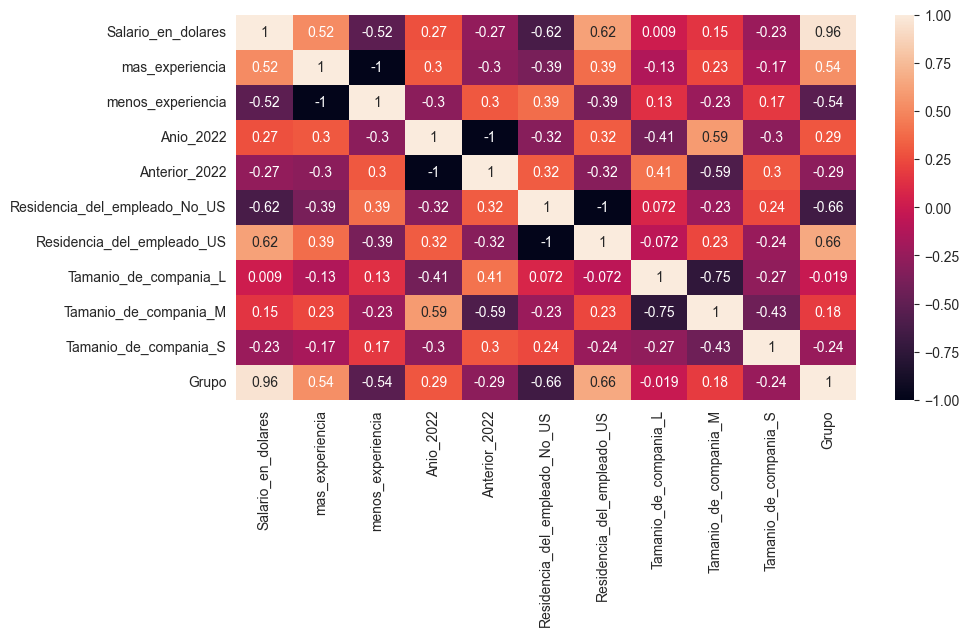

In [40]:
corrsalaryML=df_encoded.corr()
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(corrsalaryML, annot=True)
sns.color_palette("flare", as_cmap=True)
plt.show()

Al aplicar el método de filtro, puedo observar las variables que presentan una mayor correlación con mi variable objetivo, en este caso, el "Salario en dólares", que será el valor a predecir. Al analizar las correlaciones de las variables, me percato de que puedo realizar dos predicciones.

* Observamos que la cantidad de experiencia tiene una implicacion significativamente alta, al igual que si el empleado vive o no dentro de los Estados Unidos (US)
* Se observa que, si bien no es muy alta, posterior al año 2022 los salarios aumentan
* Se observa a una baja correlacion en cuanto al tamaño de la compañia grandes, que puede corresponder a una baja cantidad de observaciones.



# **💻Machine Learning**

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.ensemble import  AdaBoostRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox

## **Clasificacion**

* Se ha realizado un Random Forest Classifier
  * Se ha implementado Smote para el balance de las observaciones
  * Se ha realizado crossvalidation junto con un grafico para observar la curva de aprendimiento
  * se obsevan los resultados del Score, teniendo una precision del 0.33%

* Se ha realizado un XGBoost Classifier
  * Se ha implementado SMOTE como tecnica para complementar el balance de los datos
  * Se ha realizado un starifiedCV para complementar el balance de los datos
  * Se ha realizado GridSearch para mejora de hiperparametros
  * se ha implementado StratifiedKFold
  * Se observa el grafico del CV,
  * En algunos grupos el score es muy positivo, sin embargo el score es bajo, puede deberse a una falta de datos
  * Se observa una precision del 0.34%

<br>*El hecho de que los scores de los distintos modelos nos de muy similar, puede ser un indicativo del limite el cual los datos nos pueden ofrecer informacion.* <br>
<br>

* Se ha realizado una regresion logistica
  * Se ha implementado SMOTE
  * Se ha implementado Gridsearch
  * Se ha implementado CV junto con grafico.
  * Se observa una  precision del 0.30%

* Se ha realizado SVC
  * Se ha implementado SMOTE
  * Se ha implementado GridSearch
  * Se ha implementado StratifiedKfold
  * Se ha implementado CrossValidation
  * Se observa una precision del 0.31% de los datos



---





**Conclusion**: Luego de aplicar diferentes modelos de clasificación a los datos de salarios en dólares, se puede observar que los resultados obtenidos no alcanzan un nivel satisfactorio de precisión. La baja precisión puede ser atribuida a la limitación en la cantidad y diversidad de datos disponibles para el entrenamiento de los modelos.

Para mejorar la calidad de los modelos de clasificación, es fundamental contar con un conjunto de datos más completo y diverso. Se sugiere realizar un pedido a la empresa para obtener más información sobre los salarios de sus empleados. La inclusión de datos adicionales permitirá entrenar los modelos de manera más efectiva, lo que a su vez mejorará la precisión en la clasificación de los salarios.

En caso de que la empresa no pueda proporcionar más datos, se debe tener en cuenta que los modelos de clasificación pueden estar limitados por la información existente. En tales casos, es importante realizar una evaluación exhaustiva de las características y la distribución de los datos para identificar posibles desafíos y considerar la posibilidad de aplicar técnicas de ingeniería de características para mejorar el rendimiento del modelo.

Dado que los modelos de clasificación no han proporcionado resultados óptimos, a continuación, se procederá a aplicar modelos de regresión para predecir con mayor precisión los salarios en dólares. Se considerarán enfoques de regresión como RandomForestRegressor y Support Vector Regression (SVR), y se explorarán técnicas adicionales, como la transformación Box-Cox para mejorar la distribución de los datos.





### RandomForestClassifier

Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        29
           1       0.24      0.17      0.20        29
           2       0.21      0.17      0.19        29
           3       0.18      0.12      0.15        32
           4       0.28      0.57      0.37        30
           5       0.56      0.32      0.41        31

    accuracy                           0.33       180
   macro avg       0.33      0.33      0.32       180
weighted avg       0.33      0.33      0.31       180

Matriz de confusión en el conjunto de prueba:
[[18  6  3  1  1  0]
 [ 8  5 10  3  3  0]
 [ 3  7  5  6  8  0]
 [ 4  2  2  4 16  4]
 [ 1  0  3  5 17  4]
 [ 0  1  1  3 16 10]]
Precisión en el conjunto de entrenamiento: 0.4166666666666667
Precisión en el conjunto de prueba: 0.3277777777777778


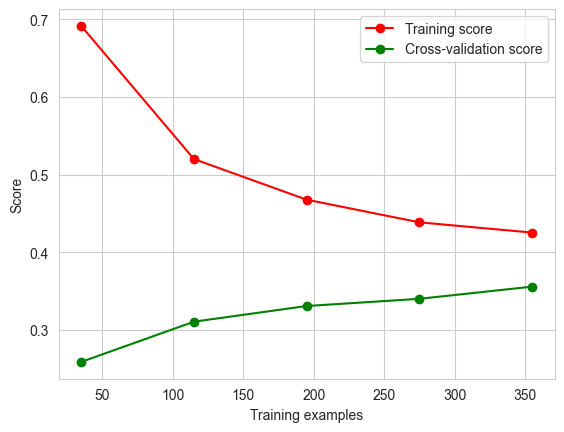

In [42]:
# Separar las características (features) y la variable objetivo
X = df_encoded.drop(['Grupo', 'Salario_en_dolares'], axis=1)
y = df_encoded['Grupo']

# Dividir los datos en conjuntos de entrenamiento y prueba manteniendo las proporciones de las clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para oversampling de las clases minoritarias en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de clasificación RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predecir las etiquetas de clase en los conjuntos de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Imprimir el informe de clasificación y la matriz de confusión en el conjunto de prueba
print('Informe de clasificación en el conjunto de prueba:')
print(classification_report(y_test, y_test_pred))

print('Matriz de confusión en el conjunto de prueba:')
print(confusion_matrix(y_test, y_test_pred))

# Imprimir la precisión del modelo en los conjuntos de entrenamiento y prueba
print('Precisión en el conjunto de entrenamiento:', train_accuracy)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train_resampled, y_train_resampled, cv=5)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

### XGBoost Classifier

Accuracy: 0.3333333333333333
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.62      0.57        29
           1       0.22      0.17      0.19        29
           2       0.25      0.17      0.20        29
           3       0.24      0.25      0.24        32
           4       0.27      0.47      0.35        30
           5       0.56      0.32      0.41        31

    accuracy                           0.33       180
   macro avg       0.34      0.33      0.33       180
weighted avg       0.34      0.33      0.33       180



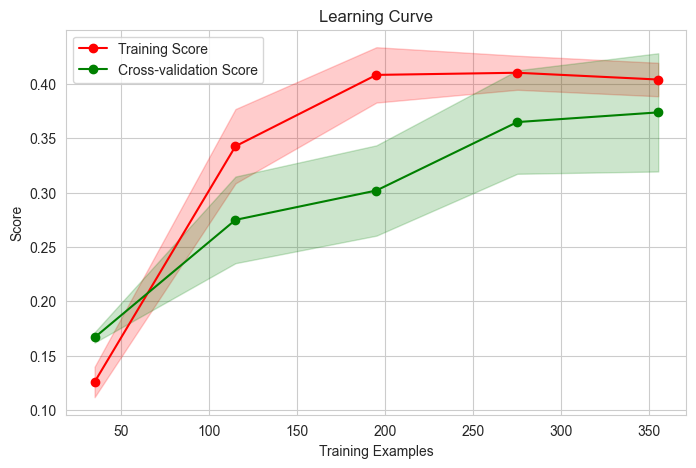

In [43]:
X = df_encoded.drop(['Grupo', 'Salario_en_dolares'], axis=1)
y = df_encoded['Grupo']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para oversampling de las clases minoritarias en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear el modelo de clasificación XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(df_encoded['Grupo'].unique()))

# Definir los hiperparámetros para GridSearch
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Crear el objeto StratifiedKFold para validación cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el objeto GridSearchCV con validación cruzada estratificada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=stratified_cv, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros con los datos resampleados
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecir los valores del conjunto de prueba usando el modelo final
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mostrar los mejores hiperparámetros
print("Best Hyperparameters:", best_params)

# Obtener las métricas de precision, recall, f1-score y support para el conjunto de prueba
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_resampled, y_train_resampled, cv=stratified_cv)

# Calcular el promedio y la desviación estándar de los puntajes de entrenamiento y validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="g")

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

### Regresion logistica

Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.69      0.51        16
           1       0.20      0.12      0.15        24
           2       0.28      0.22      0.24        23
           3       0.32      0.33      0.33        24
           4       0.33      0.53      0.41        19
           5       0.60      0.21      0.32        14

    accuracy                           0.33       120
   macro avg       0.36      0.35      0.33       120
weighted avg       0.33      0.33      0.31       120



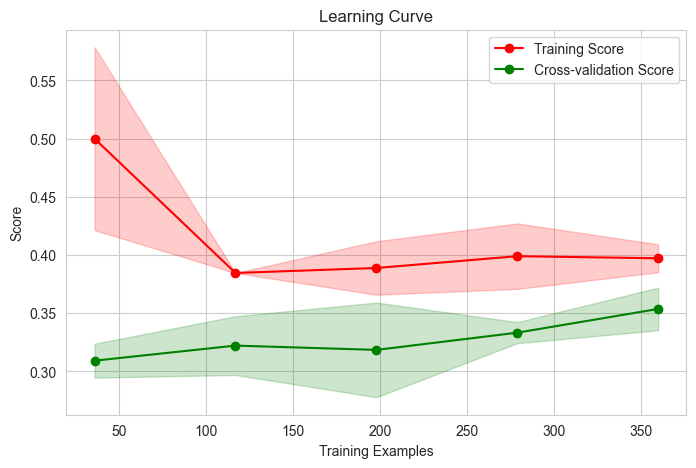

In [44]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para oversampling de las clases minoritarias en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear el modelo de Regresión Logística
logreg_model = LogisticRegression()

# Definir los hiperparámetros para GridSearch
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros con los datos resampleados
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecir los valores del conjunto de prueba usando el modelo final
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mostrar el classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_resampled, y_train_resampled, cv=3)

# Calcular el promedio y la desviación estándar de los puntajes de entrenamiento y validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="g")

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

### SVC

Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        29
           1       0.22      0.17      0.19        29
           2       0.25      0.17      0.20        29
           3       0.29      0.31      0.30        32
           4       0.24      0.47      0.31        30
           5       0.50      0.16      0.24        31

    accuracy                           0.32       180
   macro avg       0.34      0.32      0.30       180
weighted avg       0.34      0.32      0.30       180

Matriz de confusión en el conjunto de prueba:
[[18  8  1  1  1  0]
 [ 8  5 11  3  2  0]
 [ 3  7  5  7  7  0]
 [ 4  2  0 10 15  1]
 [ 1  0  2  9 14  4]
 [ 0  1  1  4 20  5]]
Precisión en el conjunto de entrenamiento: 0.3963963963963964
Precisión en el conjunto de prueba: 0.31666666666666665


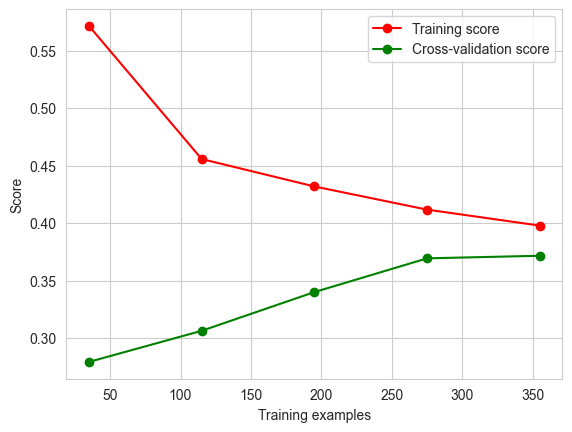

In [45]:
X = df_encoded.drop(['Grupo', 'Salario_en_dolares'], axis=1)
y = df_encoded['Grupo']

# Dividir los datos en conjuntos de entrenamiento y prueba manteniendo las proporciones de las clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para oversampling de las clases minoritarias en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear el modelo de clasificación SVM
svm_model = SVC(random_state=42)

# Definir los hiperparámetros para GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Crear el objeto StratifiedKFold para validación cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el objeto GridSearchCV con validación cruzada estratificada
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=stratified_cv, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros con los datos resampleados
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecir las etiquetas de clase en los conjuntos de entrenamiento y prueba
y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Imprimir el informe de clasificación y la matriz de confusión en el conjunto de prueba
print('Informe de clasificación en el conjunto de prueba:')
print(classification_report(y_test, y_test_pred))

print('Matriz de confusión en el conjunto de prueba:')
print(confusion_matrix(y_test, y_test_pred))

# Imprimir la precisión del modelo en los conjuntos de entrenamiento y prueba
print('Precisión en el conjunto de entrenamiento:', train_accuracy)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_resampled, y_train_resampled, cv=stratified_cv)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

## **Regresion**

* Al tratarse de regresion, realizaremos una transformacion logistica, e implementaremos 2 tipos para observar los distintos rendimientos, en este caso observaremos una transformacion Box-cox y una raiz cuadrada.
  * Se realiza copia para cada una de los situaciones. Df_encoded_X correspondiente a cada uno.



---

**Con raiz cuadrada**
* Se ha realizado Random Forest
* Se ha realizado un XGBoost
* Se ha realizado SVR
  * Para los 3 casos se han implementado Gridsearch, CrossValidation, y se han calculado R2 junto con Error absoluto medio <br>
Los resultados fueron (Basandonos en r2): <br>
***Random Forest*** 0.56 entrenamiento, 0.50 prueba <br>
***XGBoost Regressor*** 0.56 entrenamiento, 0.50 prueba <br>
***SVR*** 0.54 entrenamiento, 0.47 prueba  <br>
* Se observa que los valores se acercan al 50% en promedio, esto puede indicar una buena diversificacion de los valores, sin embargo al ser pocas observaciones el margen de mejora es pequeño.
* Se encuentra una respectiva mejora al utilizar la primera transformacion, obteniendo un 5% de mejora con respecto al dataframe sin la raiz cuadrada
---
** Con BoxCox **
* Se ha realizado Random Forest
* Se ha realizado un XGBoost
* Se ha realizado SVR
  * Para los 3 casos se han implementado Gridsearch, CrossValidation, y se han calculado R2 junto con Error absoluto medio <br>

***Random Forest*** 0.56 entrenamiento, 0.50 prueba <br>
***XGBoost Regressor*** 0.56 entrenamiento, 0.49 prueba <br>
***SVR*** 0.52 entrenamiento, 0.48 prueba  <br>

* Se observa una minima disminuicion del rendimiento de los algoritmos, sin embargo, el promedio es similar, rondando el 0.50%
* Si bien tiene diferencia en comparacion al dataframe sin transformaciones, es menor a la transformacion con raiz cuadrada.


---



### Tranformaciones

In [46]:
df_encoded_raizcuadrada = df_encoded.copy() # Se realiza copia
df_encoded_boxcox = df_encoded.copy()

In [47]:
df_encoded_raizcuadrada['Salario_en_dolares_sqrt'] = np.sqrt(df_encoded_raizcuadrada['Salario_en_dolares'])
df_encoded_boxcox['Salario_en_dolares'] = boxcox(df_encoded_boxcox['Salario_en_dolares'])[0]

## Raiz cuadrada

### Random forest con raiz cuadrada

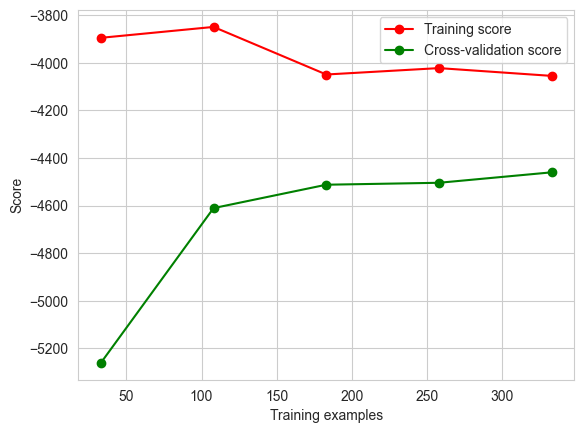

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Métricas en los datos de entrenamiento:
R²: 0.566439400781752
MAE: 50.87295744835582
Métricas en los datos de prueba:
R²: 0.5040753558359565
MAE: 51.93126851661304


In [48]:
X = df_encoded_raizcuadrada.drop(['Salario_en_dolares', 'Grupo','Salario_en_dolares_sqrt'], axis=1)
y = df_encoded_raizcuadrada['Salario_en_dolares_sqrt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los hiperparámetros y los posibles valores a probar
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de clasificación RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenar el modelo con GridSearch para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo final
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Graficar las curvas de aprendizaje con los mejores hiperparámetros
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba con el mejor modelo
print('Mejores hiperparámetros:', best_params)
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

### XGBoost con raiz cuadrada

Métricas en los datos de entrenamiento:
R²: 0.5653301225163649
MAE: 50.40894474972737
Métricas en los datos de prueba:
R²: 0.5012867348832024
MAE: 52.14529356425313


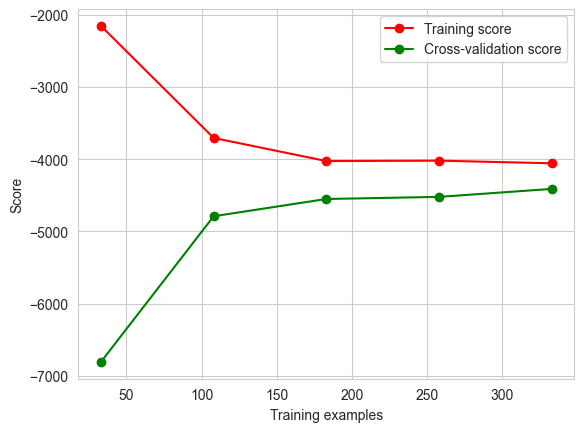

In [49]:
import xgboost as xgb

X = df_encoded_raizcuadrada.drop(['Salario_en_dolares', 'Grupo','Salario_en_dolares_sqrt'], axis=1)
y = df_encoded_raizcuadrada['Salario_en_dolares_sqrt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBRegressor(random_state=42)

# Definir los hiperparámetros a explorar en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train)

# Calcular las predicciones en el conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

# Calcular la curva de aprendizaje utilizando el modelo ajustado (best_model)
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


### SVR con raiz cuadrada

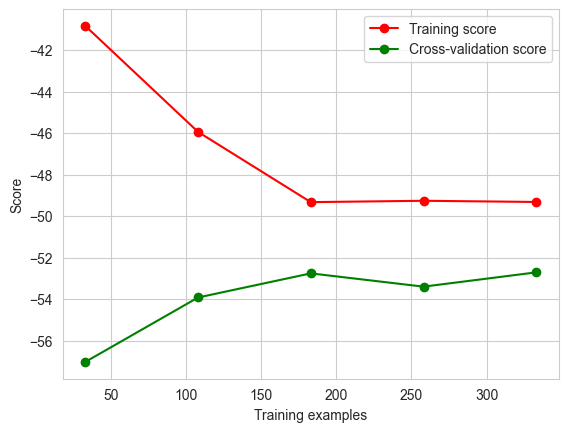

Mejores hiperparámetros: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
Métricas en los datos de entrenamiento:
R²: 0.5499534100475919
MAE: 49.76813639485493
Métricas en los datos de prueba:
R²: 0.47772437840121385
MAE: 53.313813253328995


In [50]:
X = df_encoded_raizcuadrada.drop(['Salario_en_dolares', 'Grupo','Salario_en_dolares_sqrt'], axis=1)
y = df_encoded_raizcuadrada['Salario_en_dolares_sqrt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los hiperparámetros y los posibles valores a probar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.5]
}

# Crear el modelo de regresión SVR
svr_model = SVR()

# Crear el objeto GridSearchCV con MAE como métrica de puntuación
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Entrenar el modelo con GridSearch para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo final
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Graficar las curvas de aprendizaje con los mejores hiperparámetros
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba con el mejor modelo
print('Mejores hiperparámetros:', best_params)
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

## BoxCox

### Random Forest con BoxCox

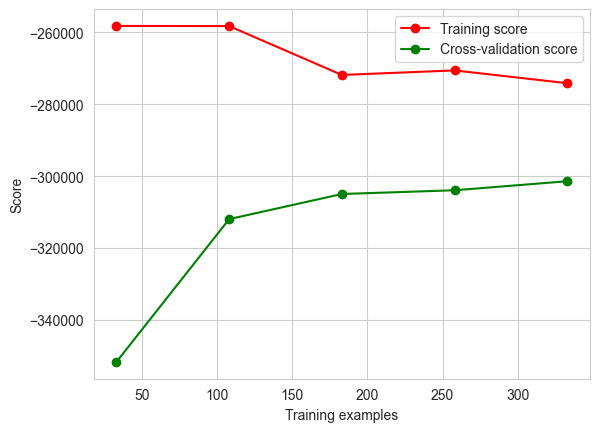

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Métricas en los datos de entrenamiento:
R²: 0.5623334234498385
MAE: 420.0195144578789
Métricas en los datos de prueba:
R²: 0.5012847738416447
MAE: 424.9980286503125


In [51]:
X = df_encoded_boxcox.drop(['Salario_en_dolares', 'Grupo'], axis=1)
y = df_encoded_boxcox['Salario_en_dolares']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los hiperparámetros y los posibles valores a probar
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de clasificación RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenar el modelo con GridSearch para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo final
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Graficar las curvas de aprendizaje con los mejores hiperparámetros
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba con el mejor modelo
print('Mejores hiperparámetros:', best_params)
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

### XGBoost con BoxCox

Métricas en los datos de entrenamiento:
R²: 0.5615632248166964
MAE: 416.14469765032095
Métricas en los datos de prueba:
R²: 0.4974943047931938
MAE: 426.691311876719


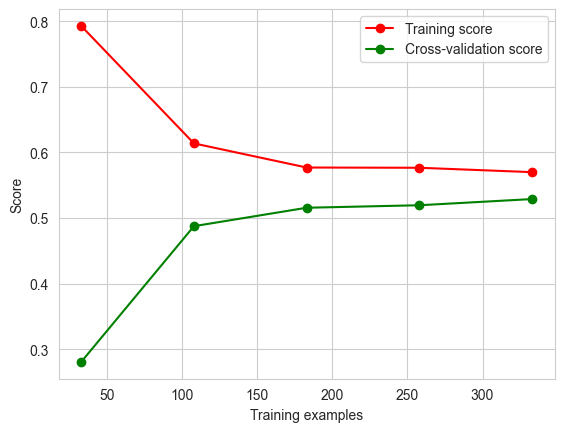

In [52]:
import xgboost as xgb

X = df_encoded_boxcox.drop(['Salario_en_dolares', 'Grupo'], axis=1)
y = df_encoded_boxcox['Salario_en_dolares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBRegressor(random_state=42)

# Definir los hiperparámetros a explorar en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento completos
best_model.fit(X_train, y_train)

# Calcular las predicciones en el conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

# Calcular la curva de aprendizaje utilizando el modelo ajustado (best_model)
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring="r2")

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


### SVR Con BoxCox

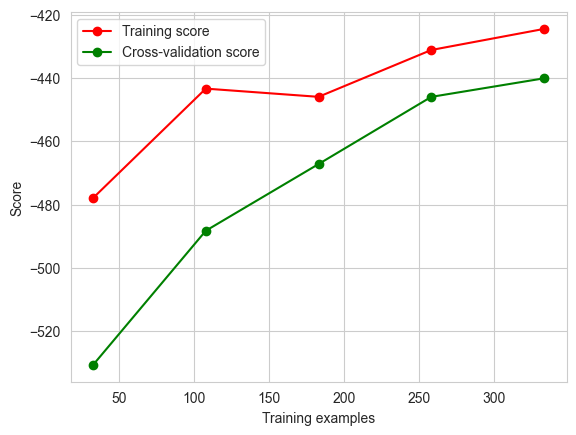

Mejores hiperparámetros: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Métricas en los datos de entrenamiento:
R²: 0.5259027478338629
MAE: 423.49376575732487
Métricas en los datos de prueba:
R²: 0.4854028478211909
MAE: 429.9819156809679


In [53]:
X = df_encoded_boxcox.drop(['Salario_en_dolares', 'Grupo'], axis=1)
y = df_encoded_boxcox['Salario_en_dolares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los hiperparámetros y los posibles valores a probar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.5]
}

# Crear el modelo de regresión SVR
svr_model = SVR()

# Crear el objeto GridSearchCV con MAE como métrica de puntuación
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Entrenar el modelo con GridSearch para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo final
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo final
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Graficar las curvas de aprendizaje con los mejores hiperparámetros
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba con el mejor modelo
print('Mejores hiperparámetros:', best_params)
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

# **Conclucion**

**Conclusion**: Luego de realizar diferentes transformaciones y aplicar modelos de regresión a los datos de salarios en dólares, se ha observado que los resultados obtenidos no muestran un significativo aumento en la precisión de los modelos. La limitada cantidad de observaciones en el conjunto de datos sigue siendo un factor que afecta el rendimiento de los algoritmos.
<br><br>
Se ha llevado a cabo la transformación con raíz cuadrada y la transformación Box-Cox para intentar mejorar la distribución de los datos y obtener predicciones más precisas. Sin embargo, en ambos casos, el rendimiento de los modelos de regresión no ha experimentado una mejora significativa en comparación con el conjunto de datos original.
<br><br>
Los modelos de regresión aplicados, que incluyen Random Forest, XGBoost Regressor y SVR, muestran una tendencia a alcanzar un puntaje de R2 en torno al 0.50, tanto en los conjuntos de entrenamiento como en los conjuntos de prueba. Esto indica que los modelos no están capturando adecuadamente la variabilidad en los datos y que la capacidad predictiva es limitada.
<br><br>
La diversificación de los valores en el conjunto de datos, posiblemente debido a la transformación, sugiere una mejora potencial, pero debido a la escasez de datos, el margen de mejora es limitado. Se han realizado esfuerzos como implementar Gridsearch y CrossValidation para encontrar los mejores hiperparámetros y minimizar el sobreajuste, pero los resultados siguen siendo modestos.
<br><br>
En conclusión, los resultados obtenidos indican que, debido a la cantidad limitada de observaciones en el conjunto de datos, no es posible obtener modelos de regresión con una precisión significativamente alta. Es recomendable continuar recopilando más datos sobre los salarios en dólares para mejorar la calidad y el rendimiento de los modelos. Mientras tanto, se debe tener en cuenta que los modelos de regresión actuales tienen limitaciones y que la precisión en la predicción de los salarios puede no ser óptima.